In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email/spam.csv


In [2]:
data = pd.read_csv("/kaggle/input/spam-email/spam.csv")

In [3]:
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

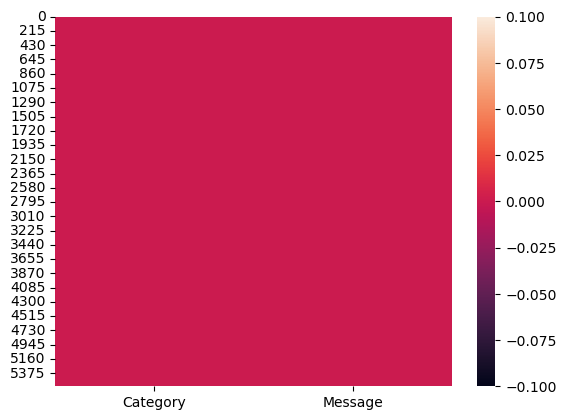

In [4]:
import seaborn as sns

sns.heatmap(data.isna())

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
data['isspam'] = pd.get_dummies(data['Category'])['spam']

In [8]:
data

,Category,Message,isspam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [9]:
data.drop('Category',axis=1,inplace=True)

In [10]:
data

,Message,isspam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [11]:
data[data['isspam']==1]
#example of spam emails

,Message,isspam
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,REMINDER FROM O2: To get 2.50 pounds free call...,1


<Axes: xlabel='isspam', ylabel='Count'>

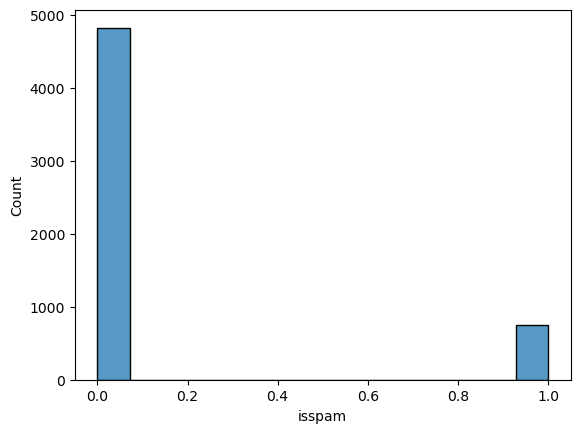

In [12]:
sns.histplot(data['isspam'])

In [13]:
import nltk
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Import necessary libraries and modules from NLTK
# Create an instance of the PorterStemmer class for word stemming
corpus = []  # Initialize an empty list to store the preprocessed text

ps = PorterStemmer()  # Create a PorterStemmer object for word stemming

# Loop through each row (indexed by 'i') in the DataFrame 'df_train'
for i in range(len(data)):
    ans = re.sub('[^A-Za-z]+', ' ', str(data["Message"][i]))  # Replace non-alphabet characters with spaces
    ans = ans.lower()  # Convert the text to lowercase
    ans = ans.split()  # Split the text into a list of words
    
    # Apply stemming using PorterStemmer and remove stopwords
    ans = [ps.stem(word) for word in ans if not word in stopwords.words('english')]
    
    ans = ' '.join(ans)  # Join the list of words back into a preprocessed sentence
    corpus.append(ans)  # Add the preprocessed sentence to the 'corpus' list


In [14]:
from sklearn.model_selection import train_test_split

X = data['Message']
y = data['isspam']
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,shuffle=True)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer #Since machine cannot understand text, we will convert text into matrics

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Create a pipeline with a vectorizer component
    ('nb', MultinomialNB())             # Step 2: Add a Naive Bayes classifier component
])


In [18]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [19]:
clf.score(x_test,y_test) #model score

0.9880382775119617

In [20]:
testing_text = ['Hi who is this?']
clf.predict(testing_text)

array([0], dtype=uint8)

In [21]:
#the above shows that this is not spam email

In [22]:
testing_text2 = ['Hi you won a lottery click here to collect']
clf.predict(testing_text2)

array([1], dtype=uint8)

In [23]:
#the above case tends to be a spam

In [24]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(x_test)

In [25]:
print(confusion_matrix(y_test,pred))


[[1460    5]
 [  15  192]]


In [26]:
cm = confusion_matrix(y_test,pred)
tp, tn, fp, fn = cm[1,1] , cm[0,0] , cm[0,1] , cm[1,0]
print(f"True Positive {tp}")
print(f"True Negative {tn}")
print(f"False Positive {fp}")
print(f"False Positive {fn}")

True Positive 192
True Negative 1460
False Positive 5
False Positive 15
